In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
def formato_grafica(titulo, ejex, ejey, leyenda=False, xlim=[None, None], ylim=[None, None]):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)

    if leyenda == True:
        plt.legend(loc='best')

    plt.tight_layout;

In [13]:
x = np.linspace(-5,5,1000)

w = 1
m = 1
h_barra = 1

In [14]:
def V(x):
    return 0.5*m*w**2*x**2

In [89]:
def Numerov(x,E,V):
    R = (2*m*V(x)/h_barra**2) - (2*m*E/h_barra**2)
    S = np.zeros_like(R)
    
    psi = np.zeros_like(x)
    psi[0] = 0
    psi[1] = 1e-5
    
    h = x[1]-x[0]
    
    for i in range(1,len(psi)-1):
        
        a = h**2*(S[i+1]+10*S[i]+S[i-1])/12
        b = 2*(1 + 5*h**2*R[i]/12)*psi[i]
        c = (1-h**2*R[i-1]/12)*psi[i-1]
        d = 1 - h**2*R[i+1]/12
        
        psi[i+1] = (a + b - c) / d
        
    return psi

In [90]:
E1 = np.arange(0,6,0.5)

E_levels1 = []

for i in E1:
    if Numerov(x,i,V)[-1]*Numerov(x,i+0.001,V)[-1] < 0:
        E_levels1.append(i)

In [91]:
E_levels1

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

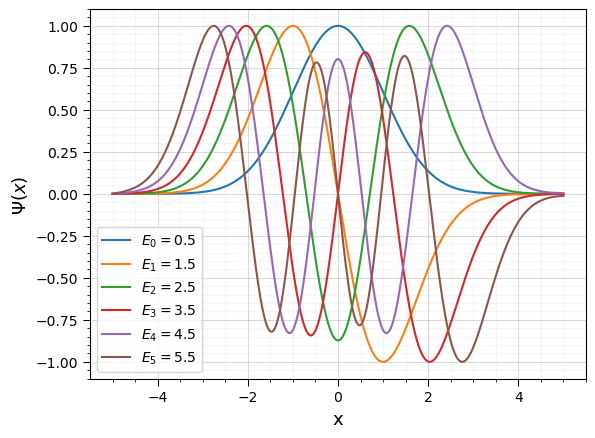

In [93]:
for i in range(len(E_levels1)):
    E_ = E_levels1[i]
    plt.plot(x,Numerov(x,E_,V)/np.max(Numerov(x,E_,V)),label="$E_{0} = {1}$".format(i,E_))

formato_grafica(None,"x","$\Psi(x)$",leyenda=True)
 

In [141]:
x2 = np.linspace(-5,5,1000)

def Vgaussian(x):
    return -10*np.exp(-x**2/20)

In [142]:
E2 = np.arange(-10,-6,0.01)

E_levels2 = []

for i in E2:
    if Numerov(x2,i,Vgaussian)[-1]*Numerov(x2,i+0.001,Vgaussian)[-1] < 0:
        E_levels2.append(i)

In [145]:
Numerov(x2,-7.62,Vgaussian)[-1]*Numerov(x2,-7.62+0.001,Vgaussian)[-1]

0.14583711113413247

In [146]:
E_levels2

[-9.51000000000001]